In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import adfuller
#import pywt
#from statsmodels.tsa.arima_model import ARIMA

In [43]:
df = pd.read_csv('btcdata.csv')
df['date'] =  pd.to_datetime(df['date'])
close = df['close'].tolist()
p_holder = len(close)
close.reverse()
close = [float(x.replace(".", "", 1)) if x.count('.') > 1 else float(x) for x in [x.replace(",", ".") for x in close]]
assert len(close) == p_holder

date = df['date'].iloc[::-1].astype('str').tolist()
assert len(close) == len(date)
assert type(close) == list, type(date) == list

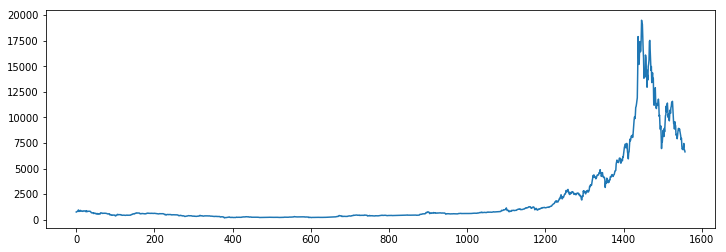

In [44]:
plt.figure(figsize = (12,4))
plt.plot(close)
plt.show()

In [45]:
result = adfuller(close)

In [46]:
print(result)

(-1.9402655560311128, 0.31336232531606967, 22, 1535, {'1%': -3.434617276362776, '5%': -2.863424739608777, '10%': -2.5677734071449034}, 21109.208969006882)


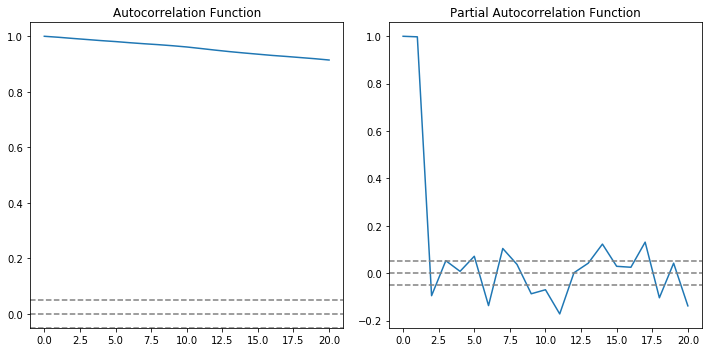

In [47]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(close, nlags=20)
lag_pacf = pacf(close, nlags=20, method='ols')

plt.figure(figsize = (10,5))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(close)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(close)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(close)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(close)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [25]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(close, order=(2,2,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\AURIMASSilva\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\AURIMASSilva\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                 1556
Model:                 ARIMA(2, 2, 2)   Log Likelihood              -10813.650
Method:                       css-mle   S.D. of innovations            251.735
Date:                Thu, 26 Apr 2018   AIC                          21639.299
Time:                        15:35:41   BIC                          21671.399
Sample:                             2   HQIC                         21651.236
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0088      0.015      0.581      0.561      -0.021       0.039
ar.L1.D2.y    -0.6483      0.080     -8.102      0.000      -0.805      -0.491
ar.L2.D2.y     0.0059      0.030      0.199      0.8

In [26]:
from pandas.plotting import autocorrelation_plot

C:\Users\AURIMASSilva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


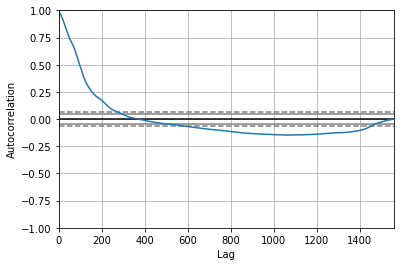

In [27]:
autocorrelation_plot(close)

In [29]:
close_dif = []
for i in range(len(close) - 1):
    close_dif.append(close[i+1] - close[i])

In [35]:
result =adfuller(close_dif)

In [39]:
df = pd.DataFrame({'close': close})

In [41]:
df.to_csv('lol.csv', index = False)